# Part D 
Initial data prep section.  Read, clean and create sets.

## 1. Reading the dataset

In [2]:
#Loading the dataset and checking
import pandas as pd

df = pd.read_csv("studentsgrade.csv")
print(df.head())
print("*****************************************")
print(df.info())

  Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65   

## Checking for null and duplicate values

In [3]:
#Checking for null values and duplicat values to clean the dataset
print(f"Missing values :\n {df.isnull().sum()}")
print(f"Duplicated values : {df.duplicated().sum()}")

Missing values :
 Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64
Duplicated values : 0


## Cleaning the dataset

In [9]:
#DataCleaning
# Fill missing values in numerical columns with the mean.

df['Attendance (%)'] = df['Attendance (%)'].fillna(df['Attendance (%)'].mean())
df['Assignments_Avg'] = df['Assignments_Avg'].fillna(df['Assignments_Avg'].mean())

#Dropping Parents_Education_Level column
df.dropna(subset=['Parent_Education_Level'], inplace=True)

print(f"Missing values :\n {df.isnull().sum()}")

Missing values :
 Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


## Training and Testing sets

In [7]:
#Training and Testing sets using scikit learning.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print(f"Train Set :\n{train_set.head()}")
print(f"Test Set :\n{test_set.head()}")

Train Set :
     Student_ID First_Name Last_Name                       Email  Gender  Age  \
514       S1514       Sara  Williams   student514@university.com  Female   20   
1921      S2921      Ahmed  Williams  student1921@university.com  Female   19   
3999      S4999       Emma   Johnson  student3999@university.com  Female   20   
2121      S3121      Maria     Davis  student2121@university.com  Female   18   
4742      S5742      Maria  Williams  student4742@university.com  Female   24   

       Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
514      Business           91.65          53.79        62.82  ...   
1921     Business           68.68          74.46        47.76  ...   
3999  Mathematics           90.86          88.60        44.19  ...   
2121  Engineering           92.72          49.60        63.92  ...   
4742  Engineering           85.80          43.95        53.98  ...   

      Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
514           

# Part D 2

Pick an initial set of features for X and the target feature y.  Explain why you made these choices.  (Note, A target that is continuous can be made discrete by creating buckets that hold a range of values. For example: If you have a feature time_of_day that ranges from 0 to 23:59, you can create 24 buckets for each of the hour intervals, 0 to 0:59, 1 to 1:59, etc.)

### Target Feature (y):

**Grade**:
This is a categorical variable that reflects the overall performance of the student. It directly corresponds to the outcome of interest in the dataset, and predicting the student's grade is a typical use case in educational data analysis. In this case, the grades (A, B, C, D, F) can be treated as a classification problem.

### Initial Feature Set (X)
1. **Attendance(%)** :Higher attendance often correlates with better academic performance, making it a strong predictor of grades.
2. **Midterm_Score** :Reflects performance halfway through the course, helping predict how students are likely to do in the end.
3. **Assignments_Avg** :Indicates consistency and understanding throughout the course.
4. **Study_Hours_per_Week** :More study time often contributes to better understanding and performance.
5. **Sleep_Hours_per_Night** :Sleep can influence cognitive function, focus, and learning capacity.

These features give a good mix of how well the student is doing in school and their personal habits, so they’re a smart and useful starting point for predicting their grade.

# Part D 3

Do a decision tree on  X and y.  Compute metrics.

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define the features and target
features = ['Attendance (%)', 'Midterm_Score', 'Study_Hours_per_Week', 'Sleep_Hours_per_Night']

# Select features (X) and target (y) for training and testing
X_train = train_set[features]
y_train = train_set['Grade']

X_test = test_set[features]
y_test = test_set['Grade']

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Predict using the trained model
y_pred = dt_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)

# Calculate Recall
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

# Calculate F1-Score
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("\nPrecision:", precision)
print("\nRecall:", recall)
print("\nF1-Score:", f1)
print("\nConfusion Matrix:\n", conf_matrix)

Accuracy: 0.3333333333333333

Precision: 0.33226145723803496

Recall: 0.3333333333333333

F1-Score: 0.3314439033653351

Confusion Matrix:
 [[97 56 15 12  9]
 [51 41  8 12 14]
 [17 15 27 23 31]
 [16 19 30 24 35]
 [12  6 20 27 25]]


# Part D 4

## Comments

- The model has low accuracy and precision, with values around 0.33, indicating poor performance in predicting grades.
- The confusion matrix shows significant misclassification across all grade categories.
- The model struggles to predict grades like 'B' and 'C', with frequent misclassifications between them and other grades.
- The balanced metrics suggest the need for improvements, such as hyperparameter tuning, feature engineering, or exploring more complex models.

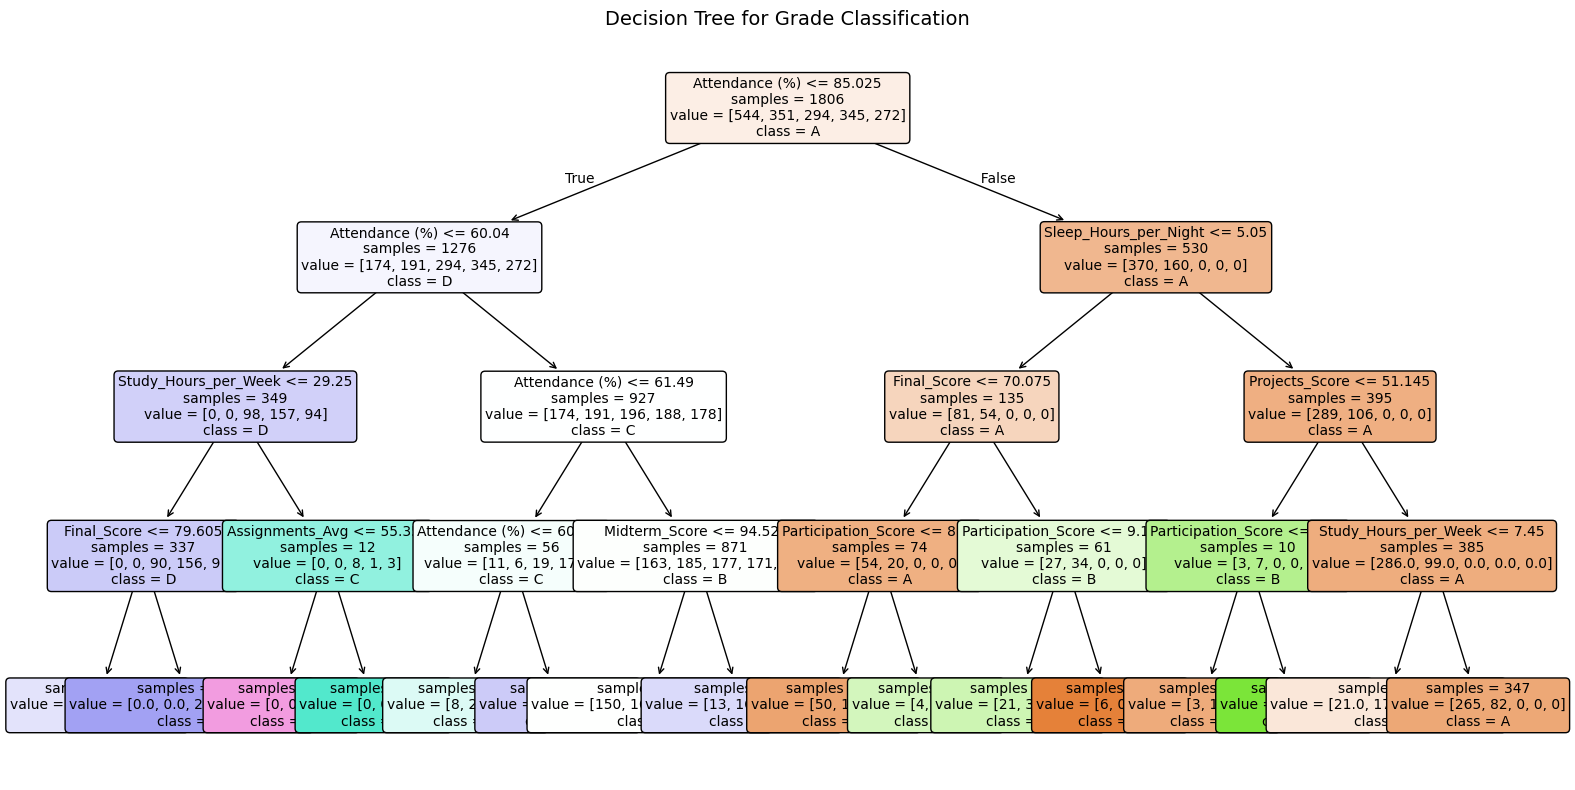

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load and clean dataset
df = pd.read_csv("studentsgrade.csv")
df_clean = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])
df_clean = df_clean.dropna()

# Encode categorical features
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Define features and target
X = df_encoded.drop(columns=['Grade_B', 'Grade_C', 'Grade_D', 'Grade_F'], errors='ignore')  # retain original features
y = df_clean['Grade']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Plot and save
plt.figure(figsize=(16, 8))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=dt_model.classes_,
    filled=True,
    rounded=True,
    impurity=False,
    fontsize=10
)
plt.title("Decision Tree for Grade Classification", fontsize=14)
plt.tight_layout()
plt.savefig("DT_plot.png", dpi=300)  # <-- Save the image
plt.show()


# Part D 5
See if you can do better using SVM or some other multi-classifier.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize the SVM classifier
svm_model = SVC(random_state=42, kernel='linear')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Calculate the metrics for the SVM model with zero_division=1 to handle undefined cases
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted', zero_division=1)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted', zero_division=1)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Print the results
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1-Score: {f1_svm}")
print(f"Confusion Matrix:\n{conf_matrix_svm}")


Accuracy: 0.367601246105919
Precision: 0.3900316162290461
Recall: 0.367601246105919
F1-Score: 0.2607990345753311
Confusion Matrix:
[[156   0   0  25   8]
 [ 99   0   0  17  10]
 [ 47   2   0  55   9]
 [ 46   1   0  71   6]
 [ 36   0   0  45   9]]


# Part D 6

Do a final evaluation with the test set.

In [24]:
# Evaluate SVM model on the test set

# Calculate the metrics for the SVM model with zero_division=1 to handle undefined cases
accuracy_svm_test = accuracy_score(y_test, y_pred_svm)
precision_svm_test = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)
recall_svm_test = recall_score(y_test, y_pred_svm, average='weighted', zero_division=1)
f1_svm_test = f1_score(y_test, y_pred_svm, average='weighted', zero_division=1)
conf_matrix_svm_test = confusion_matrix(y_test, y_pred_svm)

# Print the final evaluation results
print("Final Evaluation on Test Set:")
print(f"Accuracy: {accuracy_svm_test}")
print(f"Precision: {precision_svm_test}")
print(f"Recall: {recall_svm_test}")
print(f"F1-Score: {f1_svm_test}")
print(f"Confusion Matrix:\n{conf_matrix_svm_test}")


Final Evaluation on Test Set:
Accuracy: 0.367601246105919
Precision: 0.3900316162290461
Recall: 0.367601246105919
F1-Score: 0.2607990345753311
Confusion Matrix:
[[156   0   0  25   8]
 [ 99   0   0  17  10]
 [ 47   2   0  55   9]
 [ 46   1   0  71   6]
 [ 36   0   0  45   9]]


# Part D 7
Look at the parameters you found and discuss what you have learned.

### Decision Tree

The Decision Tree model provides an accuracy of approximately 33%, which suggests that the model struggles to effectively distinguish between the five different grade categories. Precision, recall, and F1-score are also around 33%, indicating a similar performance across all classes. The confusion matrix shows significant misclassification between some of the grades. For example, 'A' is often misclassified as 'C', and 'F' is frequently predicted as 'C' or 'D'.

### SVM

The SVM model gives a slight improvement in accuracy over the Decision Tree (36.76% compared to 33.33%). However, the precision, recall, and F1-score show that SVM still has room for improvement in predicting the grades. The confusion matrix indicates that SVM makes some strong predictions in terms of specific classes (e.g., 'A' is often predicted correctly), but it still suffers from misclassifications, particularly for grades like 'B' and 'D'. There is also a tendency for the SVM to misclassify grades into adjacent categories (e.g., 'A' being misclassified as 'D').

### Conclusion:

Both the Decision Tree and SVM models show modest performance, with the SVM slightly outperforming the Decision Tree in terms of accuracy. However, there is significant room for improvement in all metrics. Further investigation into feature selection, model tuning, and possibly adding more data could lead to better predictions.